<img width=200 src="https://www.smhi.se/polopoly_fs/1.135796.1527766089!/image/LoggaEUCP.png_gen/derivatives/Original_366px/image/LoggaEUCP.png"> <img width=200 src="https://zenodo.org/api/files/00000000-0000-0000-0000-000000000000/is-enes3/logo.png"> <img width=200 src="https://www.dtls.nl/wp-content/uploads/2015/03/NleSc.png"> <img width=200 src="https://www.dkrz.de/++theme++dkrz.theme/images/logo.png"> <img width=200 src="https://jupyter.org/assets/hublogo.svg"> <img width=200 src="https://docs.esmvaltool.org/en/latest/_static/ESMValTool-logo.png">

# Climate model weighting by performance and independence

In this notebook we show the ClimWIP method for weighting climate models. We use the new ESMValTool API to reproduce the results, and then modify some settings to show how we can build upon that existing work. Data and compute access are facilitated through the JupyterLab interface hosted at DKRZ. 

In [1]:
# The new API is accessible via the esmvalcore.experimental module. These warnings will disappear in the future.
import warnings; warnings.filterwarnings('ignore')
import esmvalcore.experimental as esmvaltool

In [2]:
config = esmvaltool.CFG
config['max_parallel_tasks'] = 6
config

Config({'auxiliary_data_dir': PosixPath('/mnt/lustre01/pf/b/b381307/auxiliary_data'),
        'compress_netcdf': False,
        'config_developer_file': None,
        'config_file': PosixPath('/pf/b/b381307/.esmvaltool/config-user.yml'),
        'drs': {'CMIP5': 'DKRZ',
                'CMIP6': 'DKRZ',
                'OBS6': 'default',
                'native6': 'default'},
        'exit_on_warning': False,
        'log_level': 'info',
        'max_parallel_tasks': 6,
        'output_dir': PosixPath('/scratch/b/b381307/esmvaltool_output'),
        'output_file_type': 'png',
        'profile_diagnostic': False,
        'remove_preproc_dir': False,
        'rootpath': {'CMIP5': [PosixPath('/work/kd0956/CMIP5/data/cmip5/output1')],
                     'CMIP6': [PosixPath('/work/ik1017/CMIP6/data/CMIP6')],
                     'OBS6': [PosixPath('/mnt/lustre02/work/bd0854/DATA/ESMValTool2/OBS')],
                     'default': [PosixPath('/pf/b/b381307/default_inputpath')],
            

# First, we'll explore the existing (basic) recipe

We'll try to run it as in, and then we'll continue to see how we can modify it

In [3]:
all_recipes = esmvaltool.get_all_recipes()
climwip_recipes = all_recipes.find('climwip')
climwip_recipes

[Recipe('Recipe climwip test performance sigma'),
 Recipe('Recipe climwip test basic'),
 Recipe('Recipe climwip-checkpoint'),
 Recipe('Recipe climwip test performance sigma-checkpoint'),
 Recipe('Recipe climwip test basic-checkpoint')]

In [4]:
climwip_basic = climwip_recipes[1]
climwip_basic

## Recipe climwip test basic

EUCP ClimWIP

### Authors
 - Peter Kalverla (NLeSC, Netherlands; https://orcid.org/0000-0002-5025-7862)
 - Stef Smeets (NLeSC, Netherlands; https://orcid.org/0000-0002-5413-9038)
 - Lukas Brunner (ETH Zurich, Switzerland; https://orcid.org/0000-0001-5760-4524)
 - Jaro Camphuijsen (NLeSC, Netherlands; https://orcid.org/0000-0002-8928-7831)
 - Ruth Lorenz (ETH Zurich, Switzerland; https://orcid.org/0000-0002-3986-1268)

### Maintainers
 - Peter Kalverla (NLeSC, Netherlands; https://orcid.org/0000-0002-5025-7862)
 - Stef Smeets (NLeSC, Netherlands; https://orcid.org/0000-0002-5413-9038)
 - Lukas Brunner (ETH Zurich, Switzerland; https://orcid.org/0000-0001-5760-4524)
 - Ruth Lorenz (ETH Zurich, Switzerland; https://orcid.org/0000-0002-3986-1268)

### Projects
 - EU H2020 project EUCP (European Climate Prediction)

### References
 - Lukas Brunner, Ruth Lorenz, Marius Zumwald, and Reto Knutti\.
Quantifying uncertainty in european climate projections using combined performance\-independence weighting\.
*Environmental Research Letters*, 14\(12\):124010, nov 2019\.
URL: [https://doi\.org/10\.1088%2F1748\-9326%2Fab492f](https://doi.org/10.1088%2F1748-9326%2Fab492f), [doi:10\.1088/1748\-9326/ab492f](https://doi.org/10.1088/1748-9326/ab492f)\.
 - Ruth Lorenz, Nadja Herger, Jan Sedláček, Veronika Eyring, Erich M\. Fischer, and Reto Knutti\.
Prospects and caveats of weighting climate models for summer maximum temperature projections over north america\.
*Journal of Geophysical Research: Atmospheres*, 123\(9\):4509–4526, May 2018\.
URL: [https://doi\.org/10\.1029/2017jd027992](https://doi.org/10.1029/2017jd027992), [doi:10\.1029/2017jd027992](https://doi.org/10.1029/2017jd027992)\.
 - Reto Knutti, Jan Sedláček, Benjamin M\. Sanderson, Ruth Lorenz, Erich M\. Fischer, and Veronika Eyring\.
A climate model projection weighting scheme accounting for performance and interdependence\.
*Geophysical Research Letters*, 2017\.
URL: [https://doi\.org/10\.1002/2016gl072012](https://doi.org/10.1002/2016gl072012), [doi:10\.1002/2016gl072012](https://doi.org/10.1002/2016gl072012)\.


In [5]:
output = climwip_basic.run()

{'auxiliary_data_dir': PosixPath('/mnt/lustre01/pf/b/b381307/auxiliary_data'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/pf/b/b381307/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'DKRZ',
         'CMIP6': 'DKRZ',
         'OBS6': 'default',
         'native6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': 6,
 'output_dir': PosixPath('/scratch/b/b381307/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/scratch/b/b381307/esmvaltool_output/recipe_climwip_test_basic_20210224_105334/plots'),
 'preproc_dir': PosixPath('/scratch/b/b381307/esmvaltool_output/recipe_climwip_test_basic_20210224_105334/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': False,
 'rootpath': {'CMIP5': [PosixPath('/work/kd0956/CMIP5/data/cmip5/output1')],
              'CMIP6': [PosixPath('/work/ik1017/CMIP6/data/CMIP6')],
              'OBS6': [PosixPath('/mnt/lustre02/work/bd0854/DATA/ESMValToo

In [6]:
output

weighted_temperature_graph/weighted_temperature_graph:
  ImageFile('temperature_anomaly_graph.png')
  DataFile('temperature_anomalies.nc')

weighted_temperature_map/weighted_temperature_map:
  ImageFile('temperature_change_difference_map.png')
  DataFile('temperature_change_weighted_map.nc')
  ImageFile('temperature_change_weighted_map.png')
  DataFile('temperature_change_difference_map.nc')

ImageFile('temperature_change_difference_map.png')
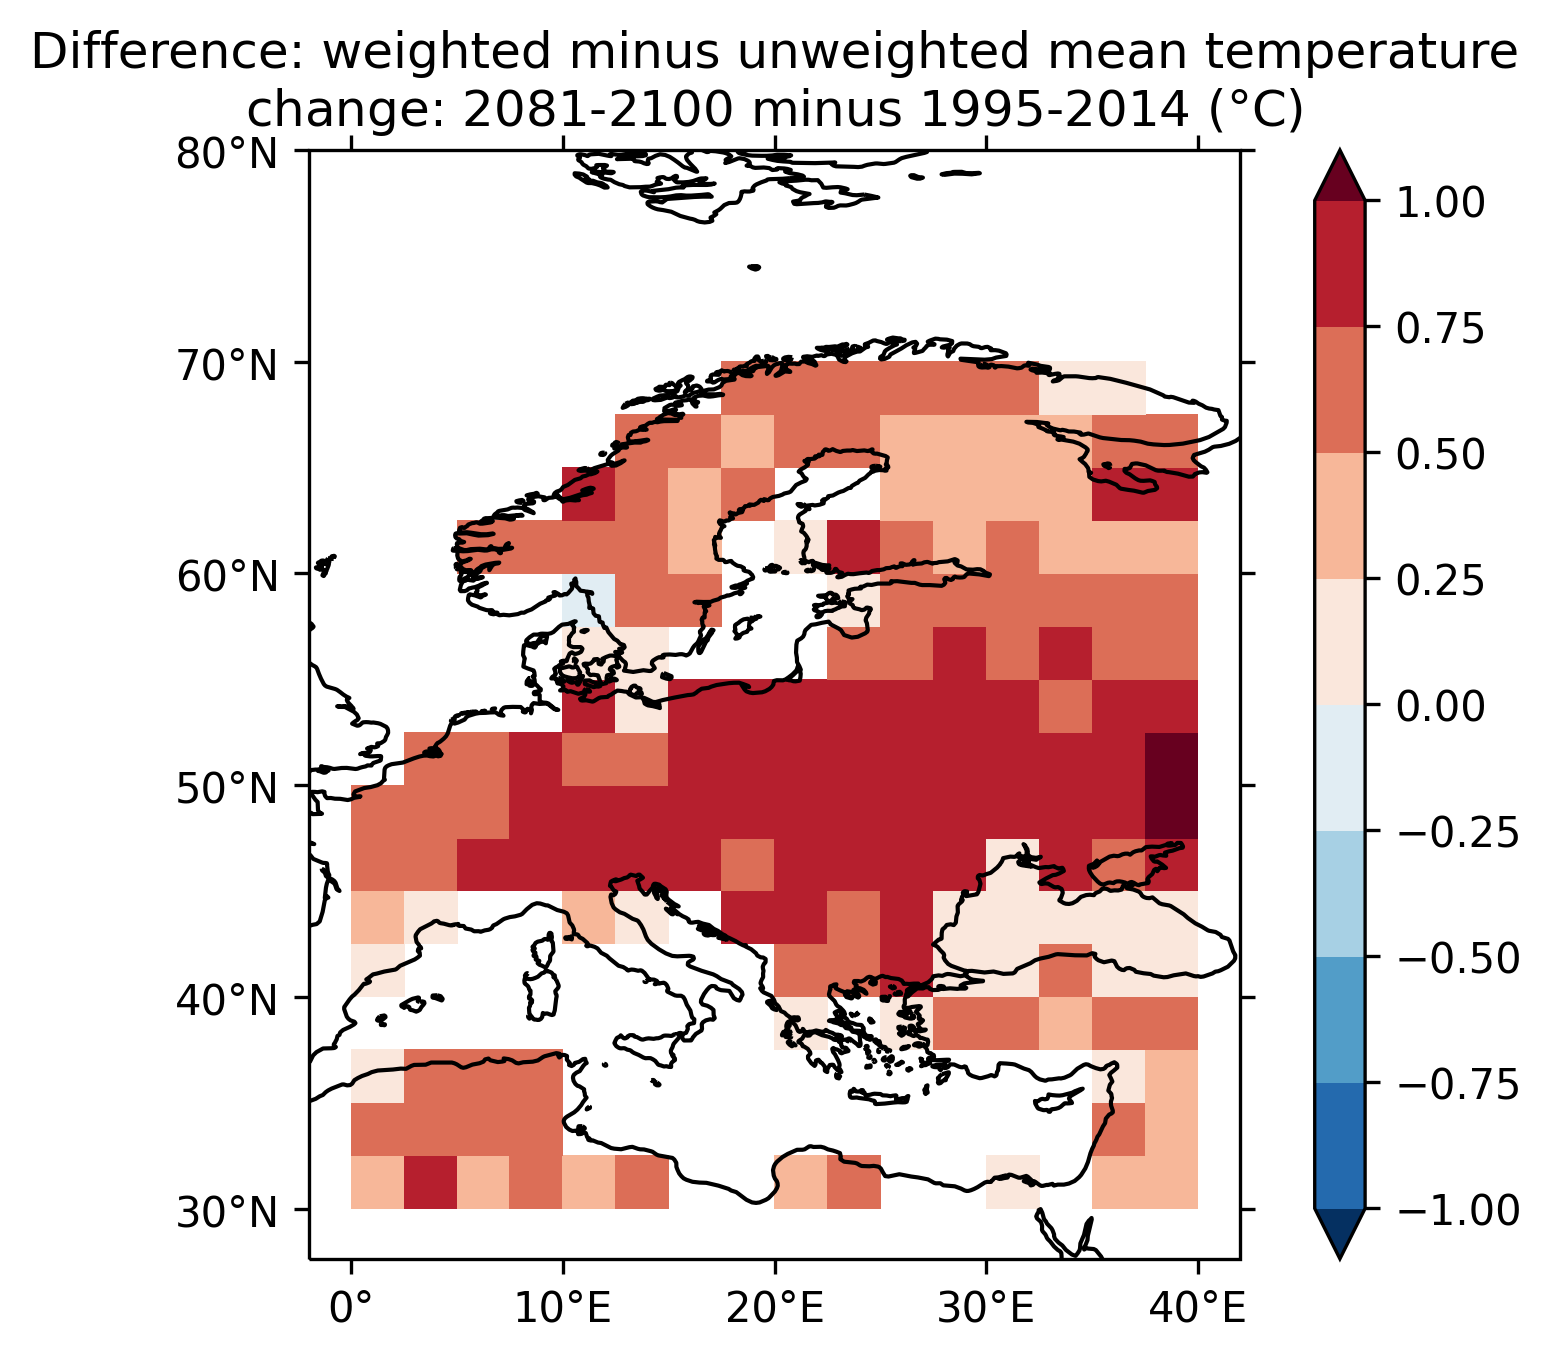

In [14]:
output['weighted_temperature_map/weighted_temperature_map'][2]

ImageFile('temperature_anomaly_graph.png')
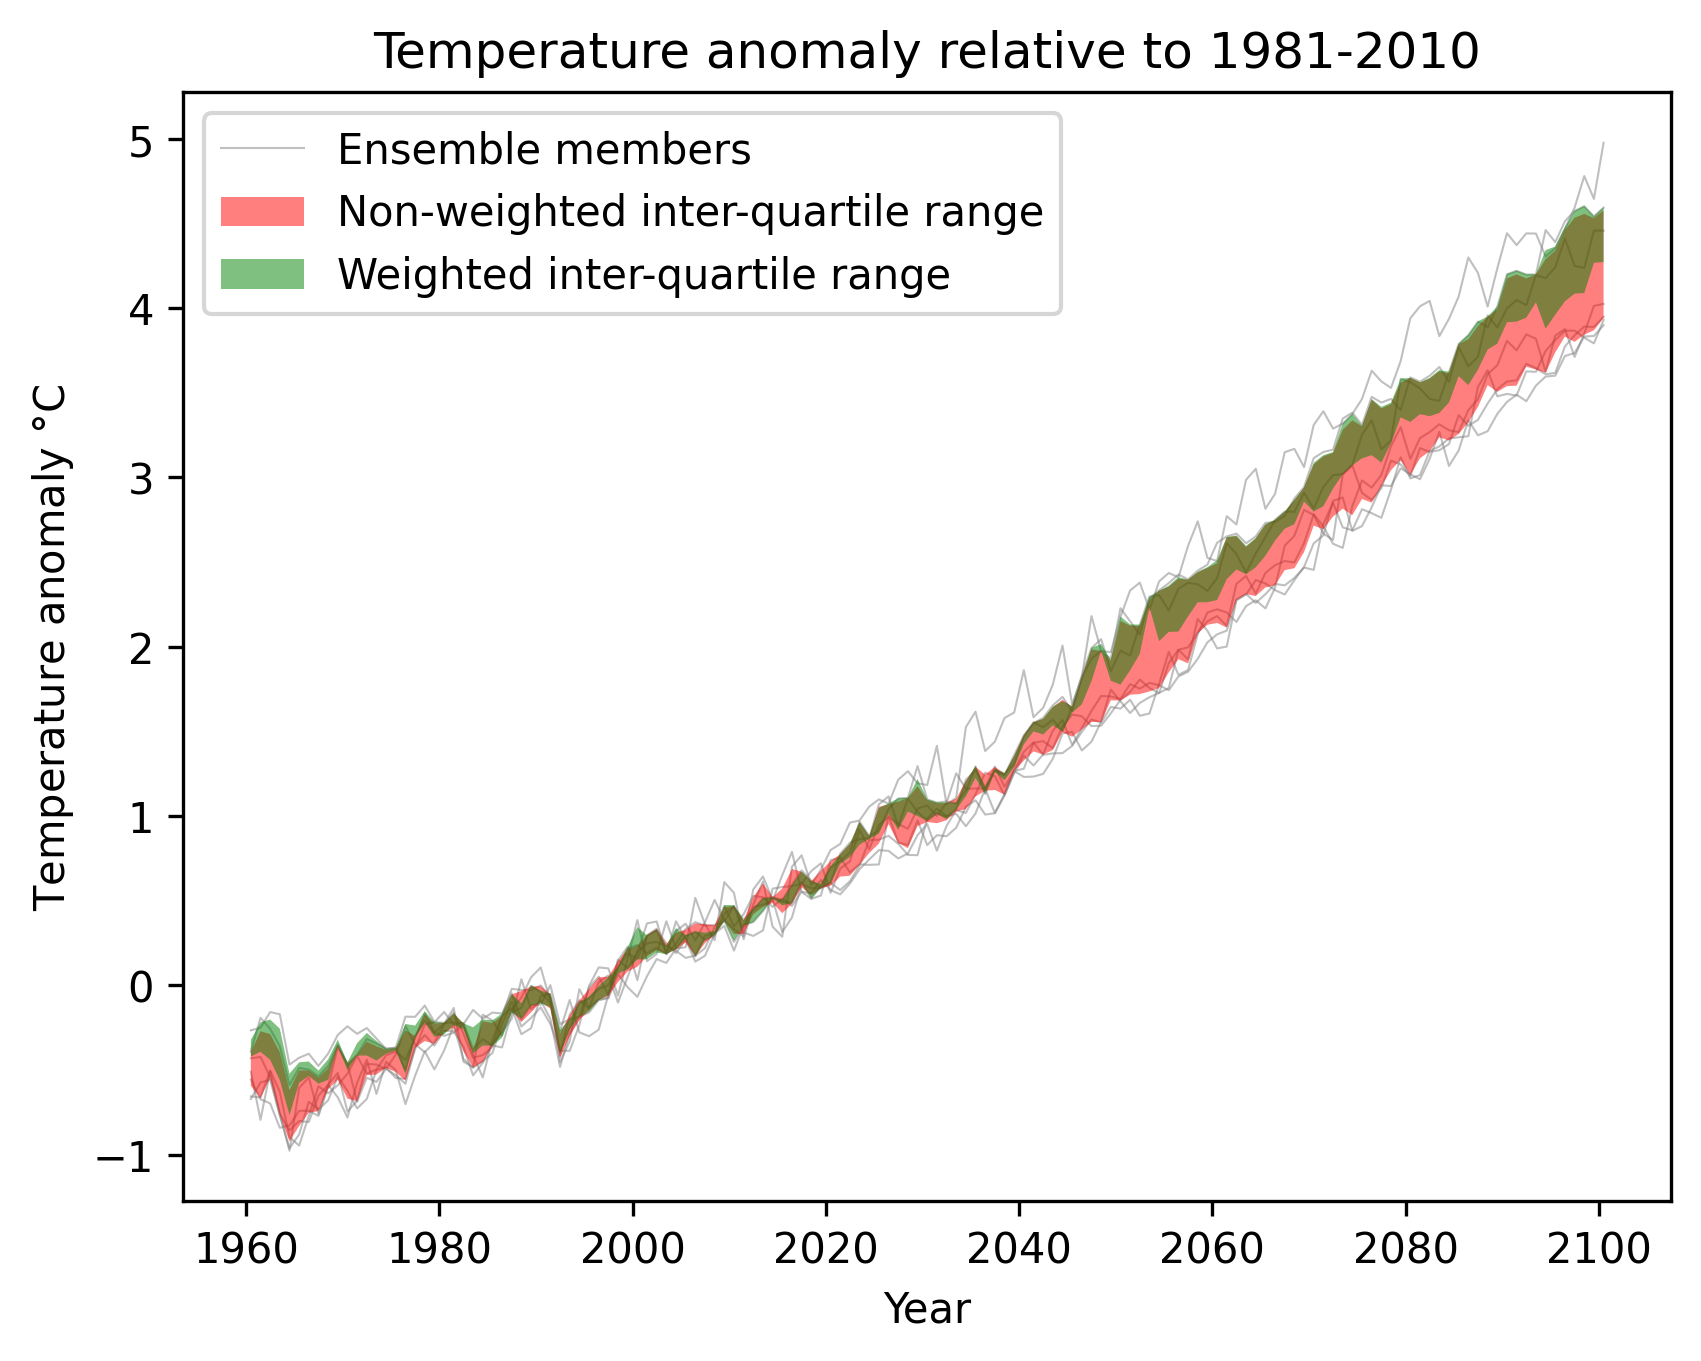

In [8]:
output['weighted_temperature_graph/weighted_temperature_graph'][0]

# Build on previous work

Next, we may try to load a local copy of the recipe, so we can edit it

In [9]:
# Unfortunately, this doesn't work yet:
# esmvaltool.get_local_copy('recipe_climwip')

# We could cheat and fall back to the command line though:
!esmvaltool recipes get recipe_climwip_test_basic.yml

2021-02-24 10:56:36,339 UTC [41228] INFO    Copying installed recipe to the current folder...
2021-02-24 10:56:36,344 UTC [41228] INFO    Recipe recipe_climwip_test_basic.yml successfully copied


Modify the recipe, for example:

- Modify the description: `Local copy of climwip recipe`
- Add a new dataset: `{project: CMIP6, exp: [historical, ssp585], dataset: ACCESS-CM2, ensemble: r1i1p1f1, grid: gn}`
- Change the performance sigma: `performance_sigma: 0.7`
- Change the period for the map plot: `start_year: 2035` and `end_year: 2065`

Run the recipe again to confirm this works

In [10]:
climwip_local = esmvaltool.get_recipe('./recipe_climwip_test_basic.yml')
climwip_local

## Recipe climwip test basic

EUCP ClimWIP

### Authors
 - Peter Kalverla (NLeSC, Netherlands; https://orcid.org/0000-0002-5025-7862)
 - Stef Smeets (NLeSC, Netherlands; https://orcid.org/0000-0002-5413-9038)
 - Lukas Brunner (ETH Zurich, Switzerland; https://orcid.org/0000-0001-5760-4524)
 - Jaro Camphuijsen (NLeSC, Netherlands; https://orcid.org/0000-0002-8928-7831)
 - Ruth Lorenz (ETH Zurich, Switzerland; https://orcid.org/0000-0002-3986-1268)

### Maintainers
 - Peter Kalverla (NLeSC, Netherlands; https://orcid.org/0000-0002-5025-7862)
 - Stef Smeets (NLeSC, Netherlands; https://orcid.org/0000-0002-5413-9038)
 - Lukas Brunner (ETH Zurich, Switzerland; https://orcid.org/0000-0001-5760-4524)
 - Ruth Lorenz (ETH Zurich, Switzerland; https://orcid.org/0000-0002-3986-1268)

### Projects
 - EU H2020 project EUCP (European Climate Prediction)

### References
 - Lukas Brunner, Ruth Lorenz, Marius Zumwald, and Reto Knutti\.
Quantifying uncertainty in european climate projections using combined performance\-independence weighting\.
*Environmental Research Letters*, 14\(12\):124010, nov 2019\.
URL: [https://doi\.org/10\.1088%2F1748\-9326%2Fab492f](https://doi.org/10.1088%2F1748-9326%2Fab492f), [doi:10\.1088/1748\-9326/ab492f](https://doi.org/10.1088/1748-9326/ab492f)\.
 - Ruth Lorenz, Nadja Herger, Jan Sedláček, Veronika Eyring, Erich M\. Fischer, and Reto Knutti\.
Prospects and caveats of weighting climate models for summer maximum temperature projections over north america\.
*Journal of Geophysical Research: Atmospheres*, 123\(9\):4509–4526, May 2018\.
URL: [https://doi\.org/10\.1029/2017jd027992](https://doi.org/10.1029/2017jd027992), [doi:10\.1029/2017jd027992](https://doi.org/10.1029/2017jd027992)\.
 - Reto Knutti, Jan Sedláček, Benjamin M\. Sanderson, Ruth Lorenz, Erich M\. Fischer, and Veronika Eyring\.
A climate model projection weighting scheme accounting for performance and interdependence\.
*Geophysical Research Letters*, 2017\.
URL: [https://doi\.org/10\.1002/2016gl072012](https://doi.org/10.1002/2016gl072012), [doi:10\.1002/2016gl072012](https://doi.org/10.1002/2016gl072012)\.


In [11]:
climwip_local.run()

{'auxiliary_data_dir': PosixPath('/mnt/lustre01/pf/b/b381307/auxiliary_data'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/pf/b/b381307/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'DKRZ',
         'CMIP6': 'DKRZ',
         'OBS6': 'default',
         'native6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_parallel_tasks': 6,
 'output_dir': PosixPath('/scratch/b/b381307/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/scratch/b/b381307/esmvaltool_output/recipe_climwip_test_basic_20210224_105637/plots'),
 'preproc_dir': PosixPath('/scratch/b/b381307/esmvaltool_output/recipe_climwip_test_basic_20210224_105637/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': False,
 'rootpath': {'CMIP5': [PosixPath('/work/kd0956/CMIP5/data/cmip5/output1')],
              'CMIP6': [PosixPath('/work/ik1017/CMIP6/data/CMIP6')],
              'OBS6': [PosixPath('/mnt/lustre02/work/bd0854/DATA/ESMValToo

weighted_temperature_graph/weighted_temperature_graph:
  ImageFile('temperature_anomaly_graph.png')
  DataFile('temperature_anomalies.nc')

weighted_temperature_map/weighted_temperature_map:
  ImageFile('temperature_change_weighted_map.png')
  DataFile('temperature_change_difference_map.nc')
  ImageFile('temperature_change_difference_map.png')
  DataFile('temperature_change_weighted_map.nc')

In [12]:
output = climwip_local.get_output()

ImageFile('temperature_change_difference_map.png')
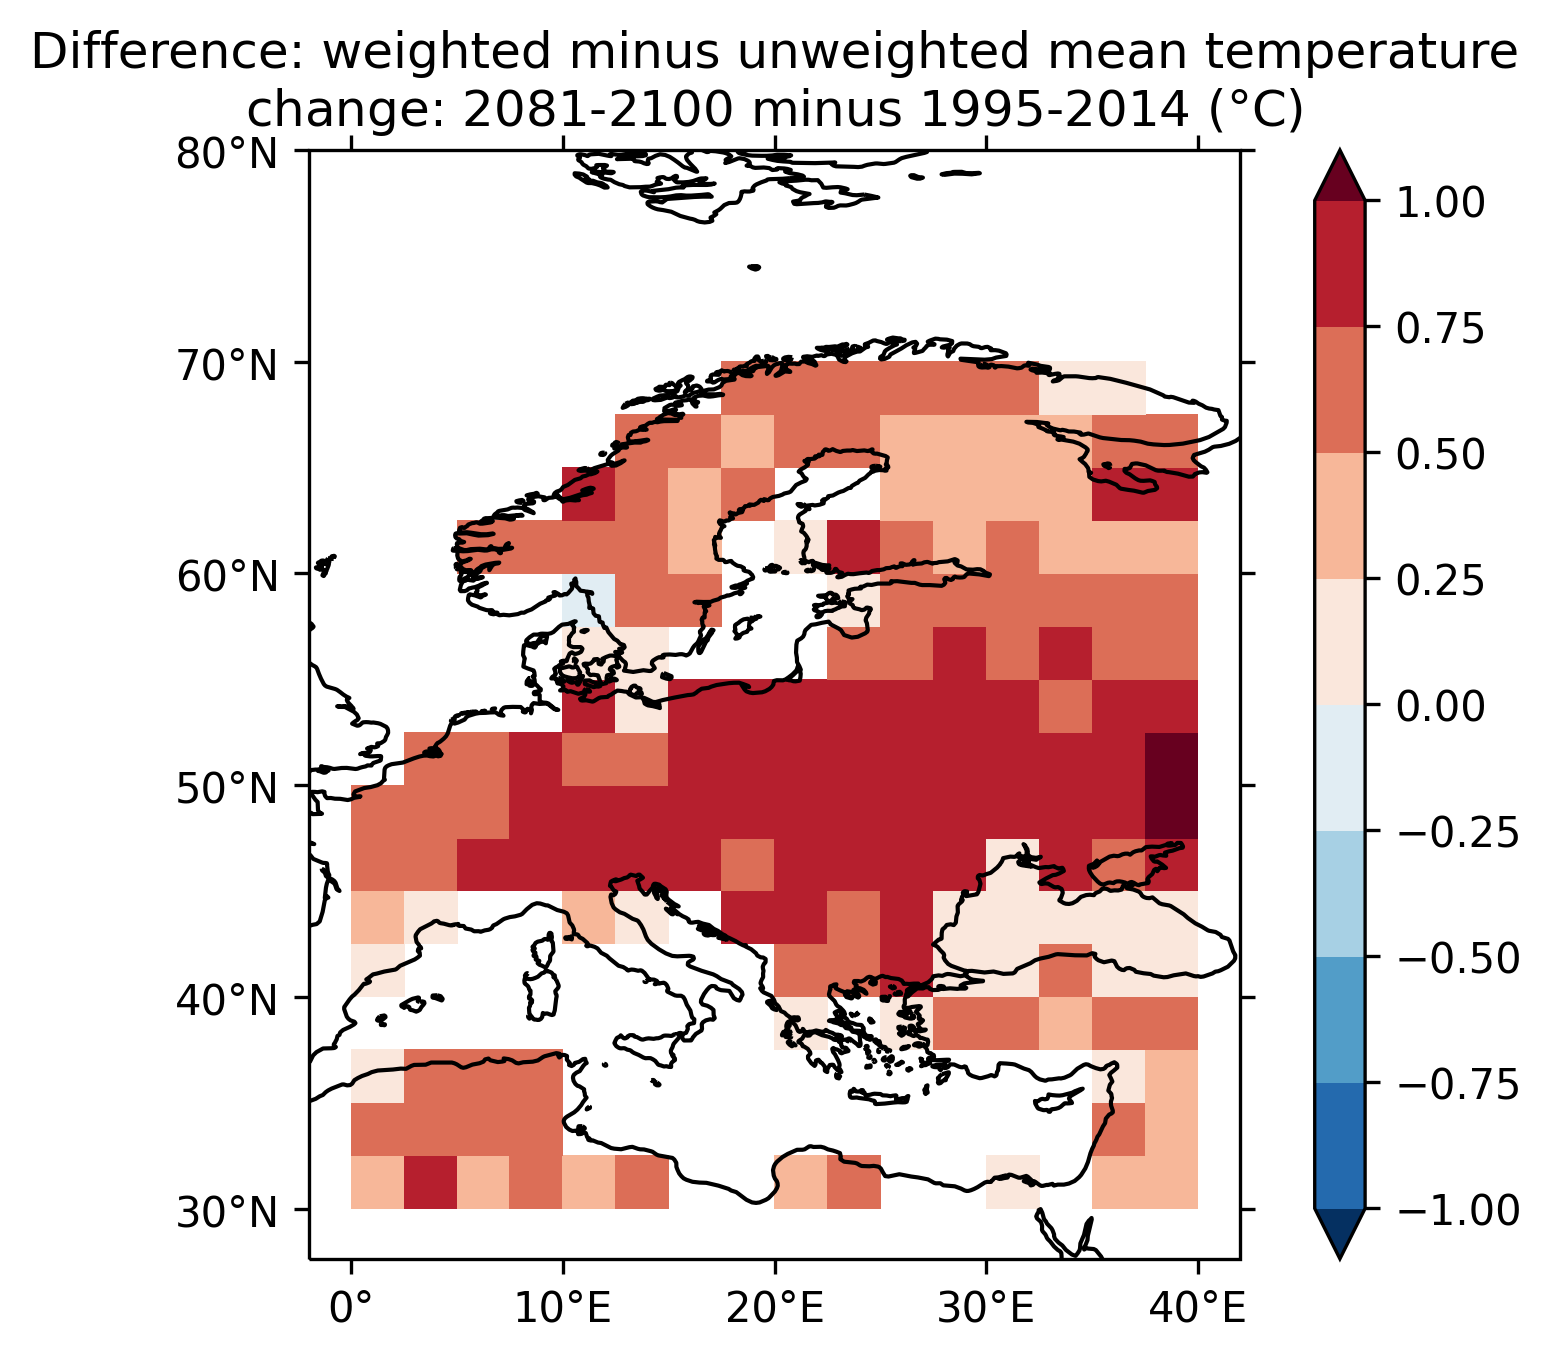

In [13]:
output['weighted_temperature_map/weighted_temperature_map'][2]

For more info, see https://docs.esmvaltool.org/en/latest/recipes/recipe_climwip.html